In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pickle
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
pruning_config_hashes = {
    "none": "fdda88f15729a5f42b5c1dd5e2f95aaf",
    "each-operation": "374102aefbd5748a5ac334ca9be92bd1",
    "each-step": "048896136dd1358b8ce8269be3283ff4",
    "on-finish": "73c4344e9c575c9f83c4d7f6eaca3cf1",
}

In [4]:
targets = ["postgres", "postgres_inmemory", "databricks"]
experiments = ["count", "sum", "avg", "min", "max"]

experiment_results = {}

for target in targets:
    experiment_results[target] = {}
    for experiment in experiments:
        experiment_results[target][experiment] = {}
        for prune_method, hashname in pruning_config_hashes.items():
            execution_times = np.load(
                f"../experiment_results/{target}/{experiment}/{hashname}/execution_times.npy",
                allow_pickle=True
            )
            experiment_results[target][experiment][prune_method] = execution_times

experiment_results

{'postgres': {'count': {'none': array([[1.54678000e-01, 1.53300000e-01, 1.46184000e-01, 1.38739000e-01,
           1.34067000e-01, 1.31638000e-01, 1.47967000e-01, 1.38192000e-01,
           1.36715000e-01, 1.36705000e-01, 1.42153000e-01, 1.38421000e-01,
           1.43950000e-01, 1.41132000e-01],
          [1.33836000e-01, 1.44935000e-01, 1.51434000e-01, 1.45629000e-01,
           1.37951000e-01, 1.74896000e-01, 1.59652000e-01, 1.58331000e-01,
           1.69625000e-01, 1.72192000e-01, 1.79192000e-01, 1.92259000e-01,
           2.33176000e-01, 2.23376000e-01],
          [1.53016000e-01, 1.52723000e-01, 1.63935000e-01, 1.51710000e-01,
           1.46765000e-01, 1.59282000e-01, 1.70152000e-01, 1.94496000e-01,
           2.10844000e-01, 2.55532000e-01, 3.10299000e-01, 5.80339000e-01,
           5.13284000e-01, 8.50549000e-01],
          [1.36086000e-01, 1.37311000e-01, 1.38905000e-01, 1.46638000e-01,
           1.56369000e-01, 1.91932000e-01, 2.25833000e-01, 2.71835000e-01,
           5.9

## Combined Scatter Plots

postgres


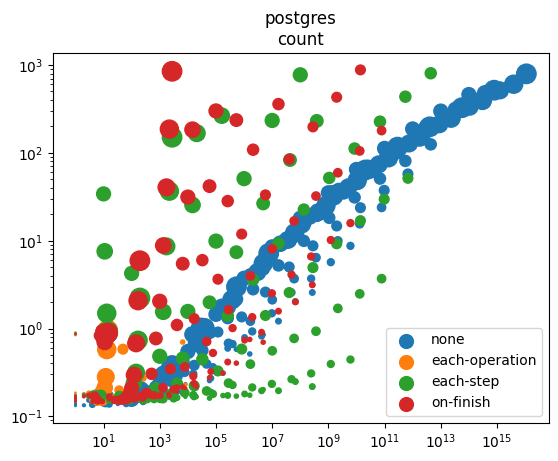

postgres


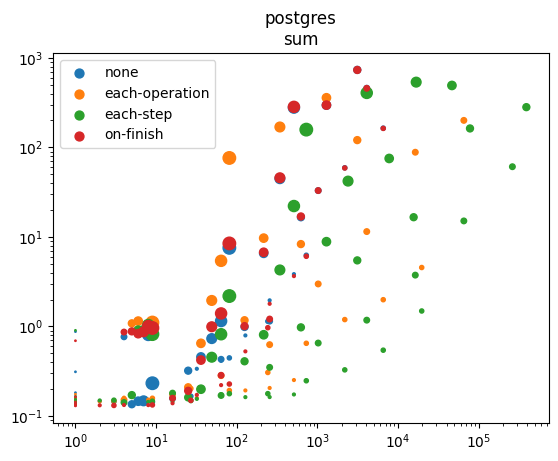

postgres


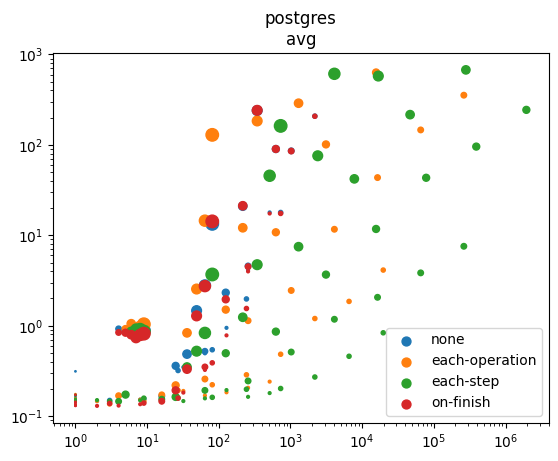

postgres


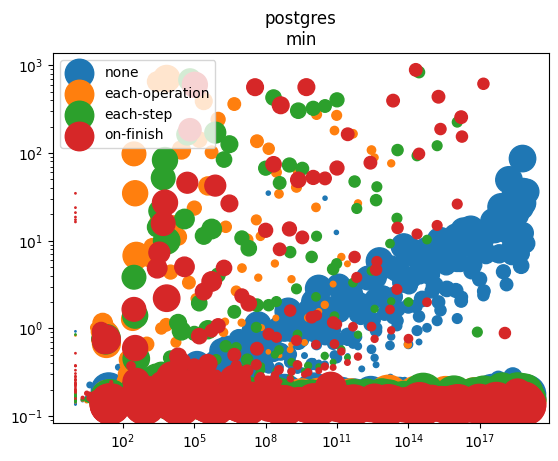

postgres


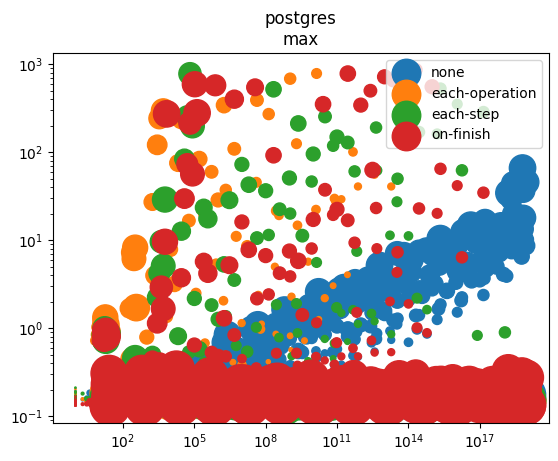

postgres_inmemory


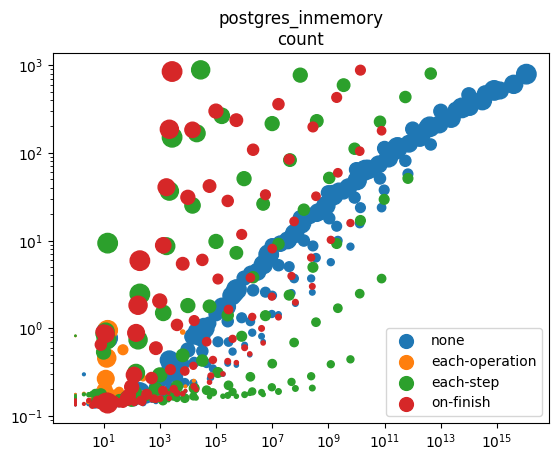

postgres_inmemory


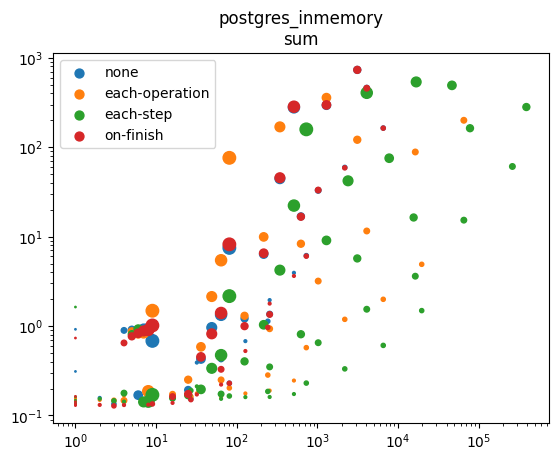

postgres_inmemory


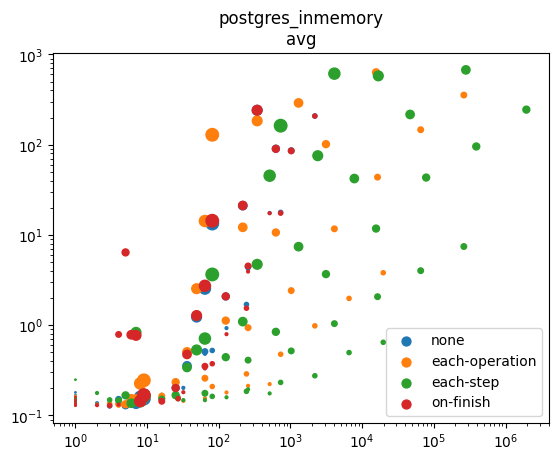

postgres_inmemory


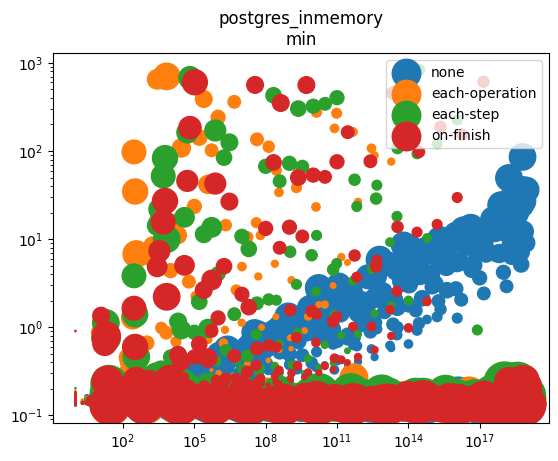

postgres_inmemory


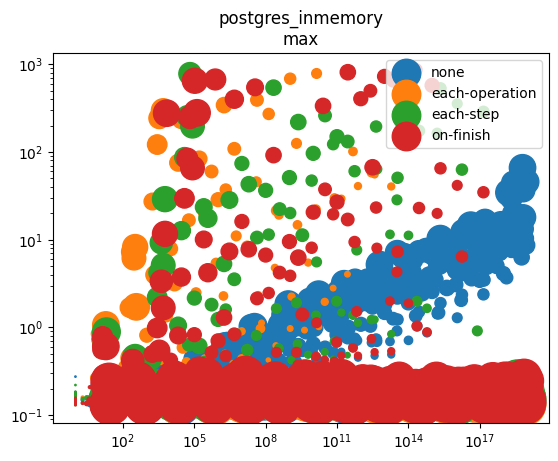

databricks


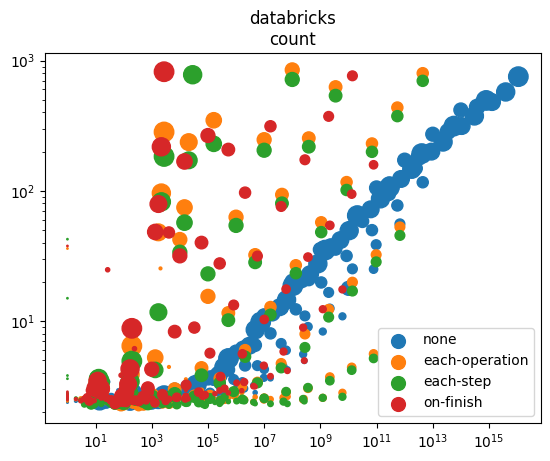

databricks


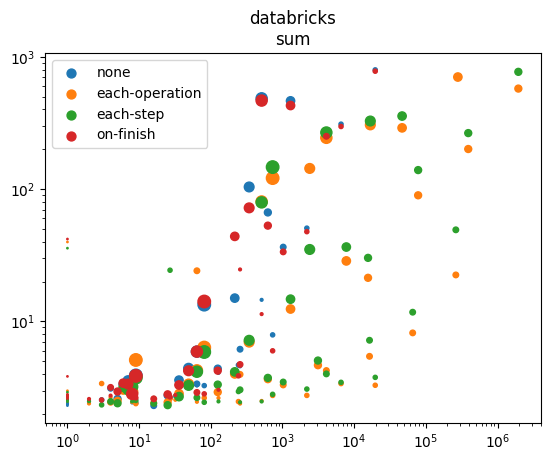

databricks


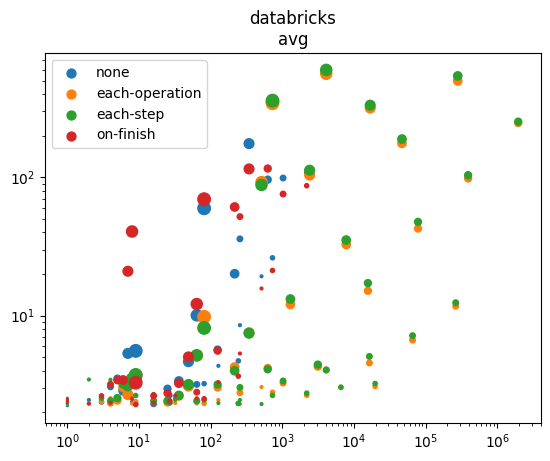

databricks


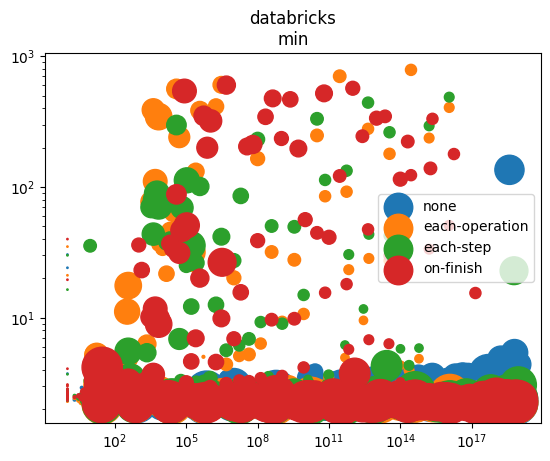

databricks


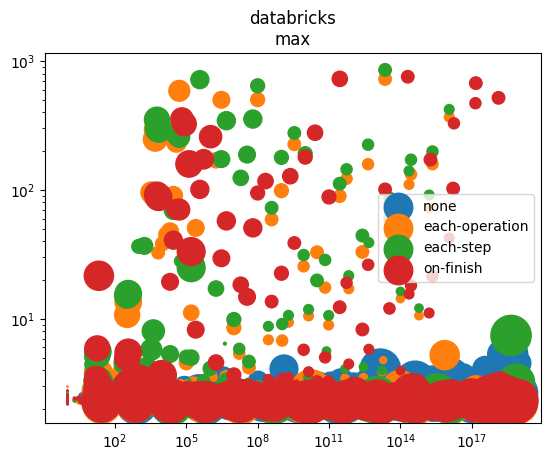

In [40]:
for target in targets:
    for experiment in experiments:
        fig, ax = plt.subplots()
        for prune_method in pruning_config_hashes.keys():
            execution_times = np.array(
                experiment_results[target][experiment][prune_method],
                dtype=float
            )
            
            xrange = np.arange(1, execution_times.shape[0] + 1)
            yrange = np.arange(1, execution_times.shape[1] + 1)
    
            X, Y = np.meshgrid(xrange, yrange)
            world_counts = (Y ** X).flatten()
            flat_execution_times = execution_times.flatten()
            areas = Y.flatten() ** 2
    
            ax.set_title(f"{target}\n{experiment}")
            ax.set_xscale("log")
            ax.set_yscale("log")
            ax.scatter(world_counts, flat_execution_times, s=areas, label=prune_method)
            
        ax.legend()

        print(target)
        display(fig)
        plt.savefig(f"../figures/agg_scatter_{target}_{experiment}.png")
        plt.close()

## Individual 3D Plots

postgres


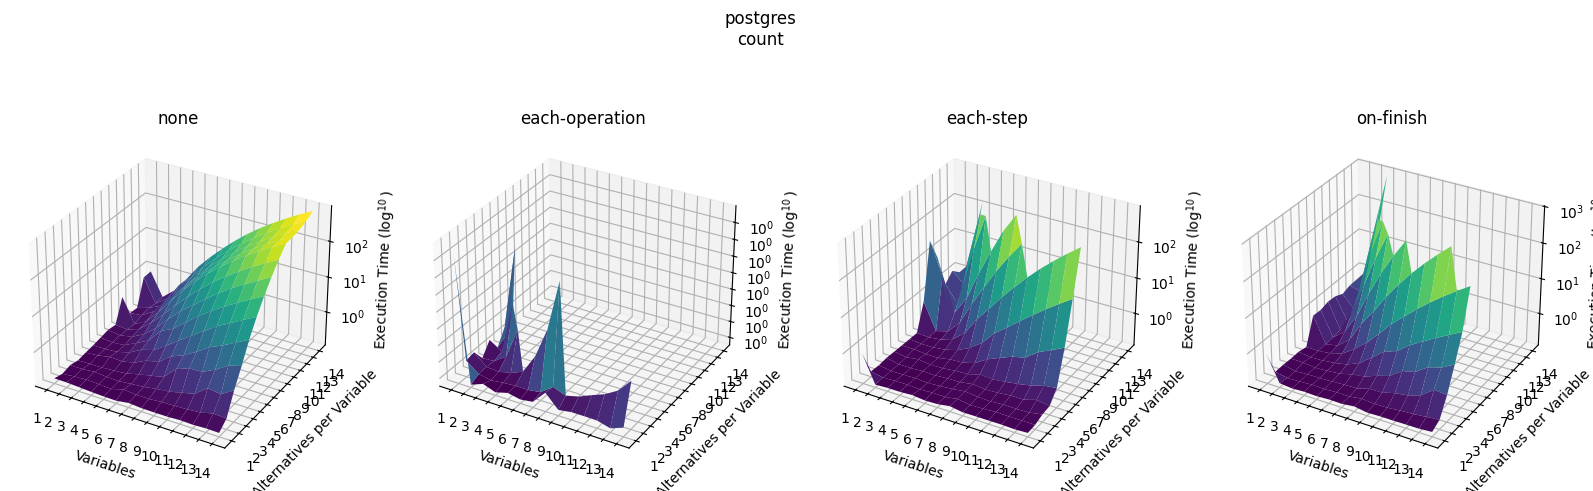

postgres


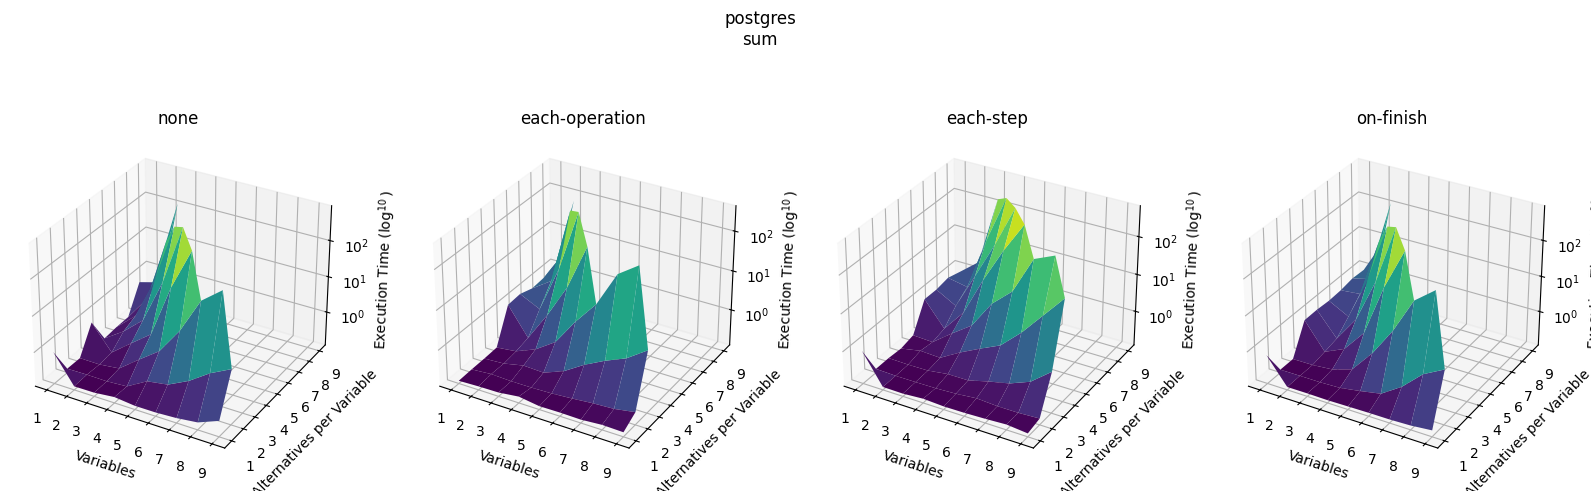

postgres


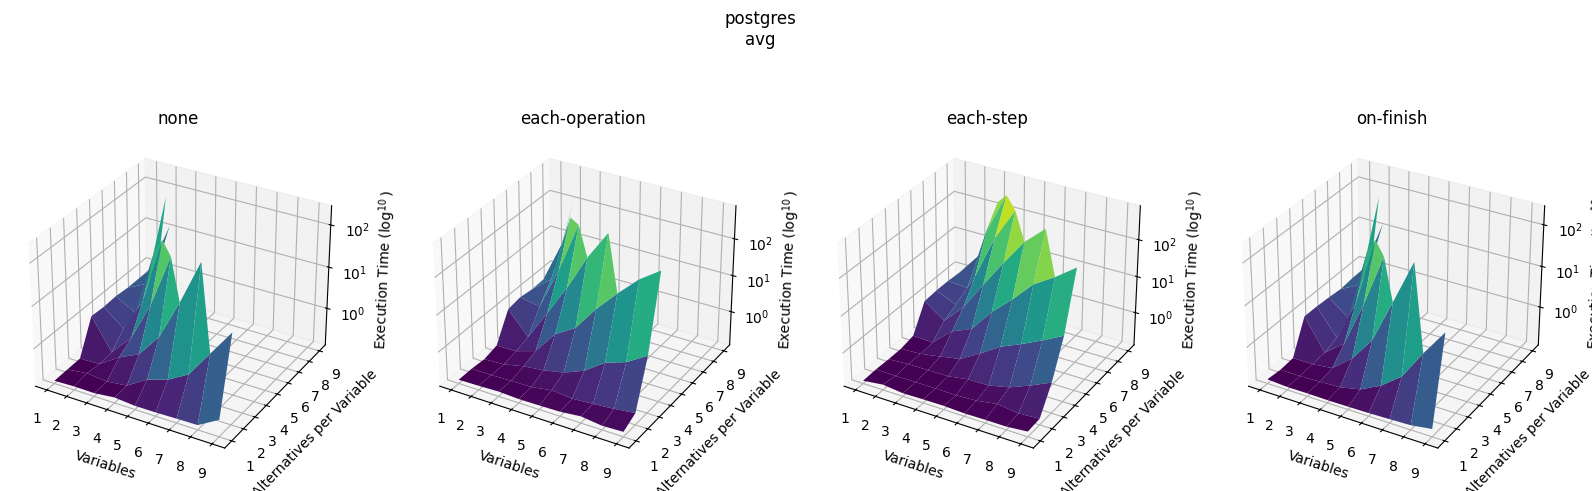

postgres


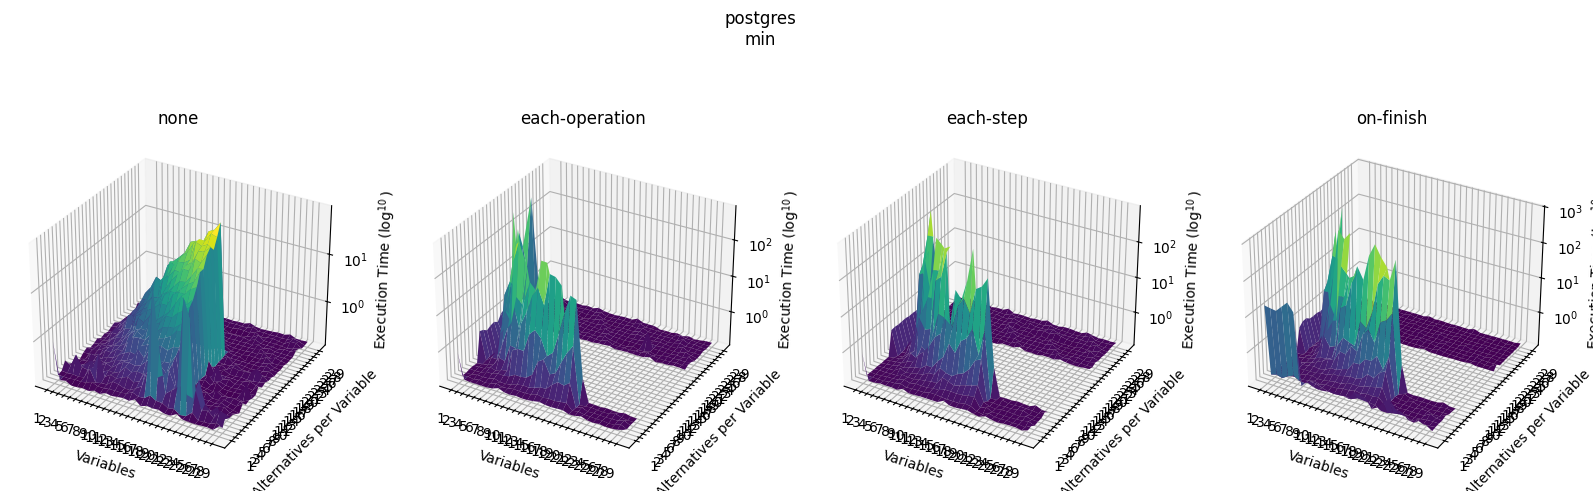

postgres


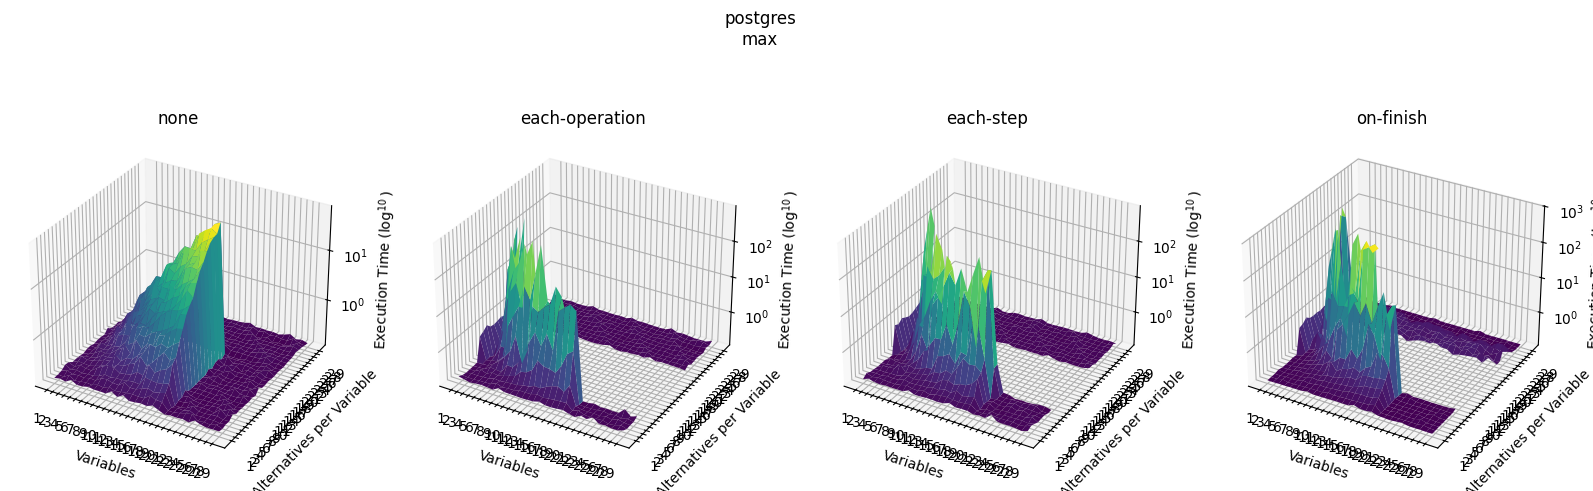

postgres_inmemory


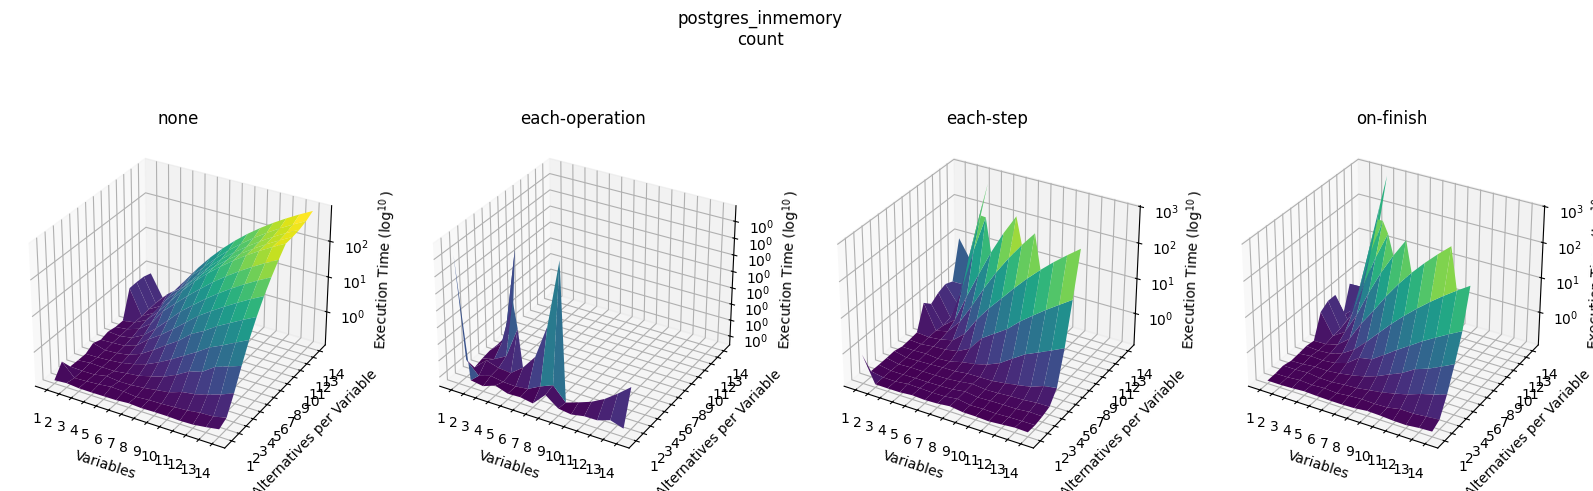

postgres_inmemory


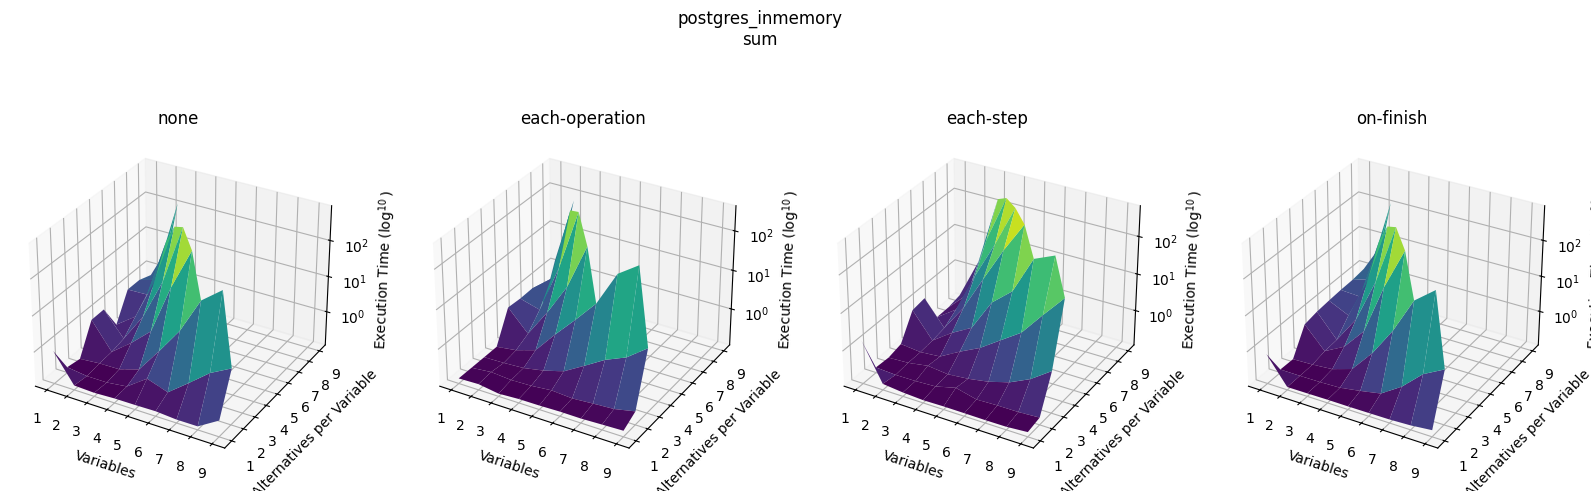

postgres_inmemory


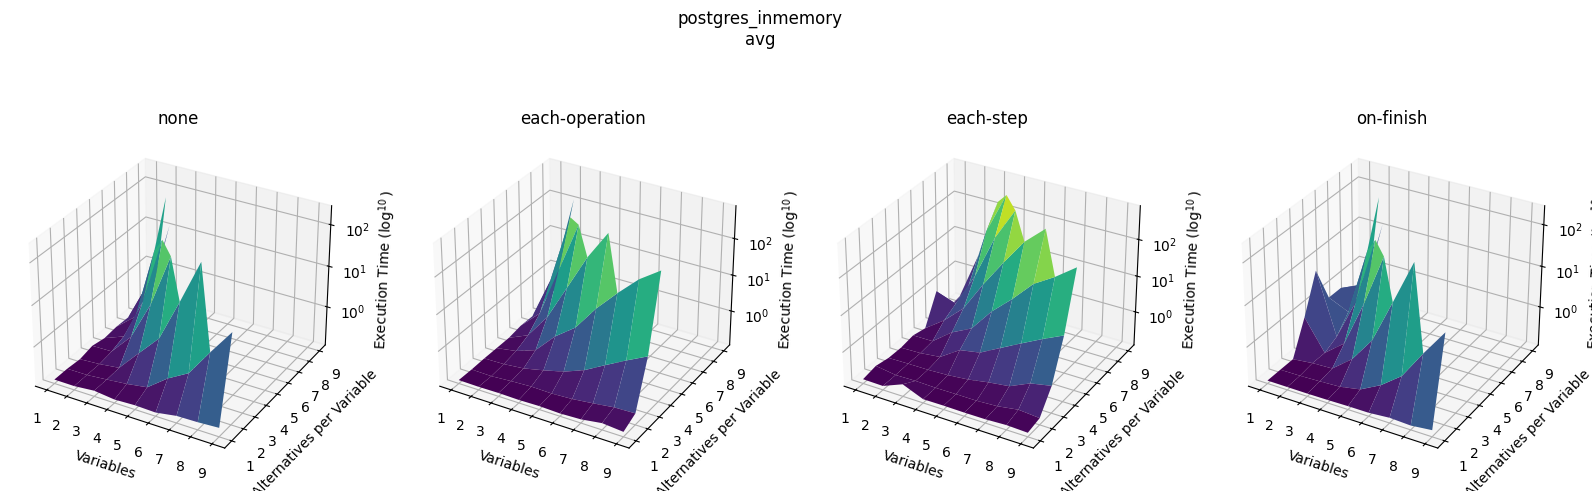

postgres_inmemory


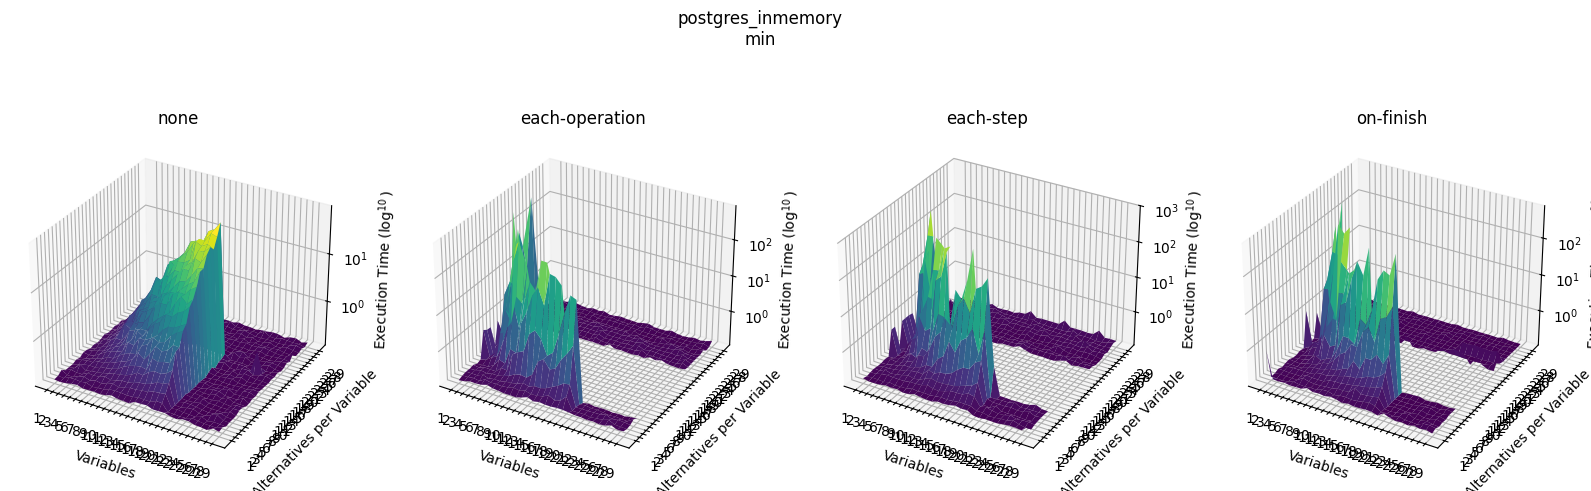

postgres_inmemory


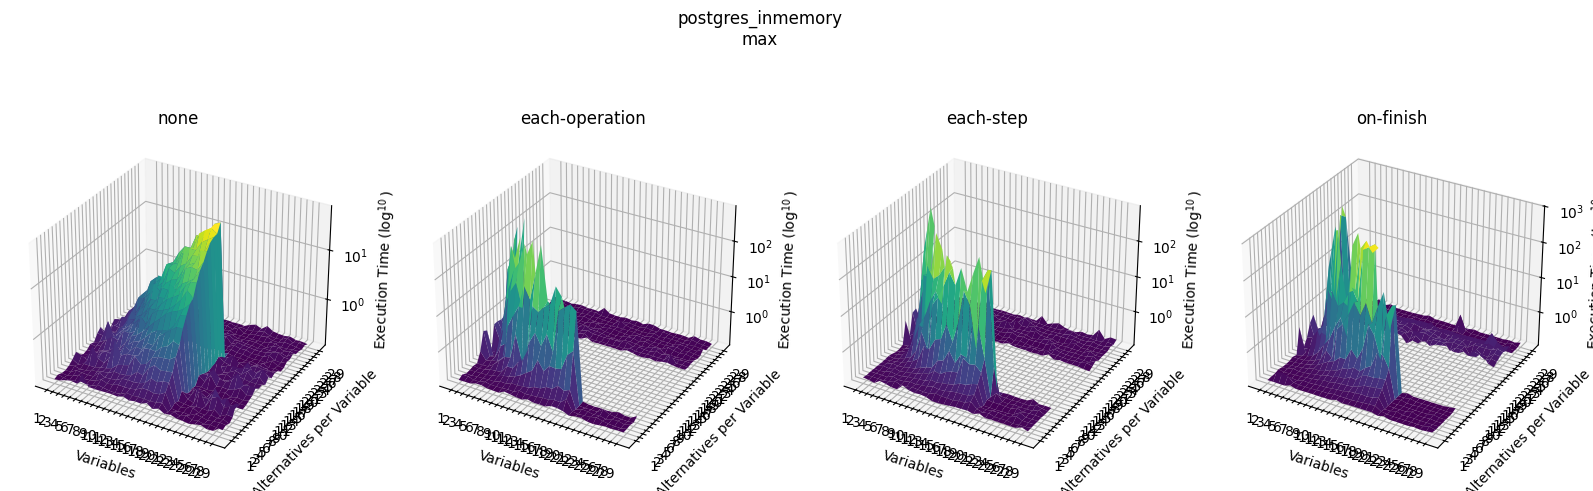

databricks


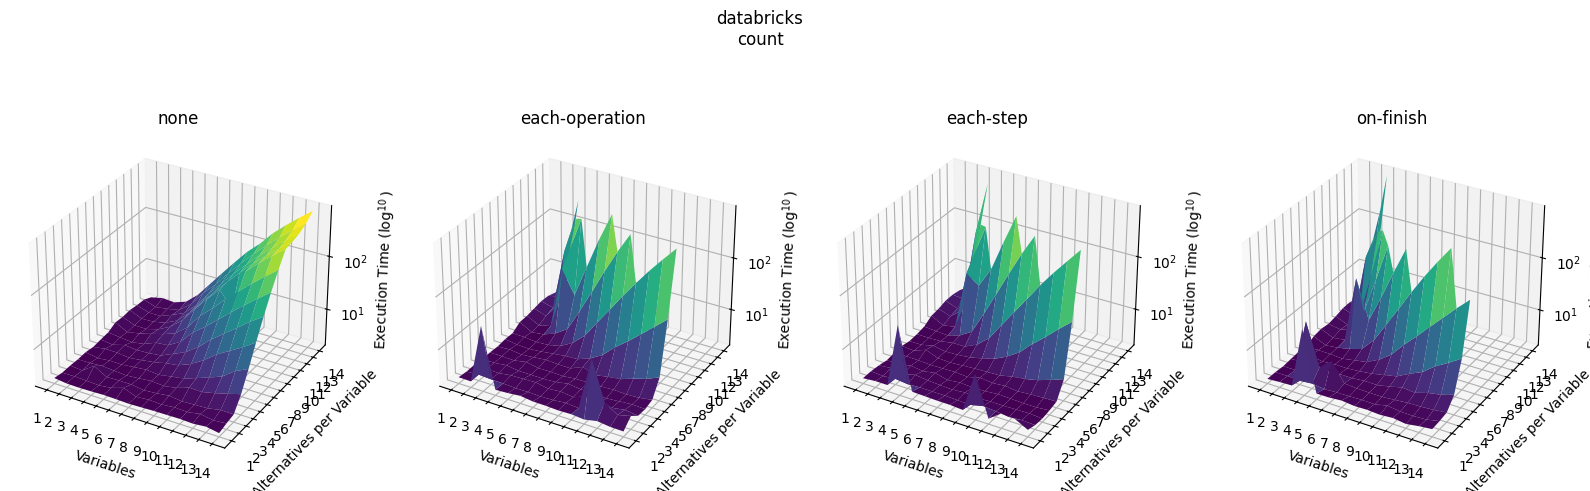

databricks


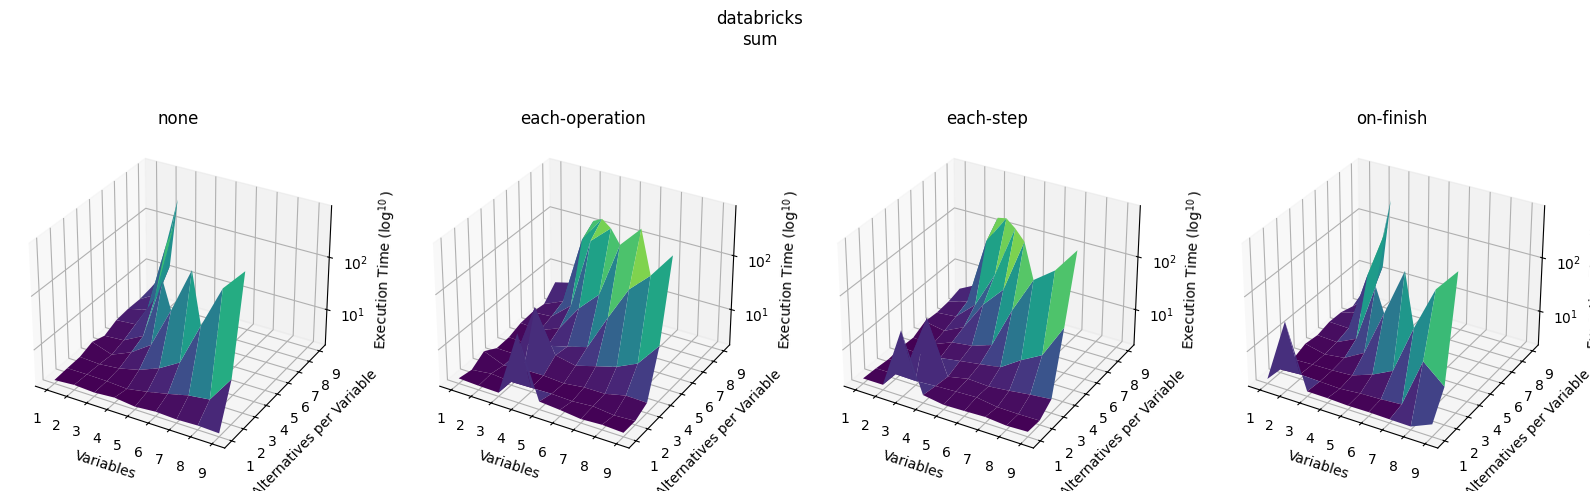

databricks


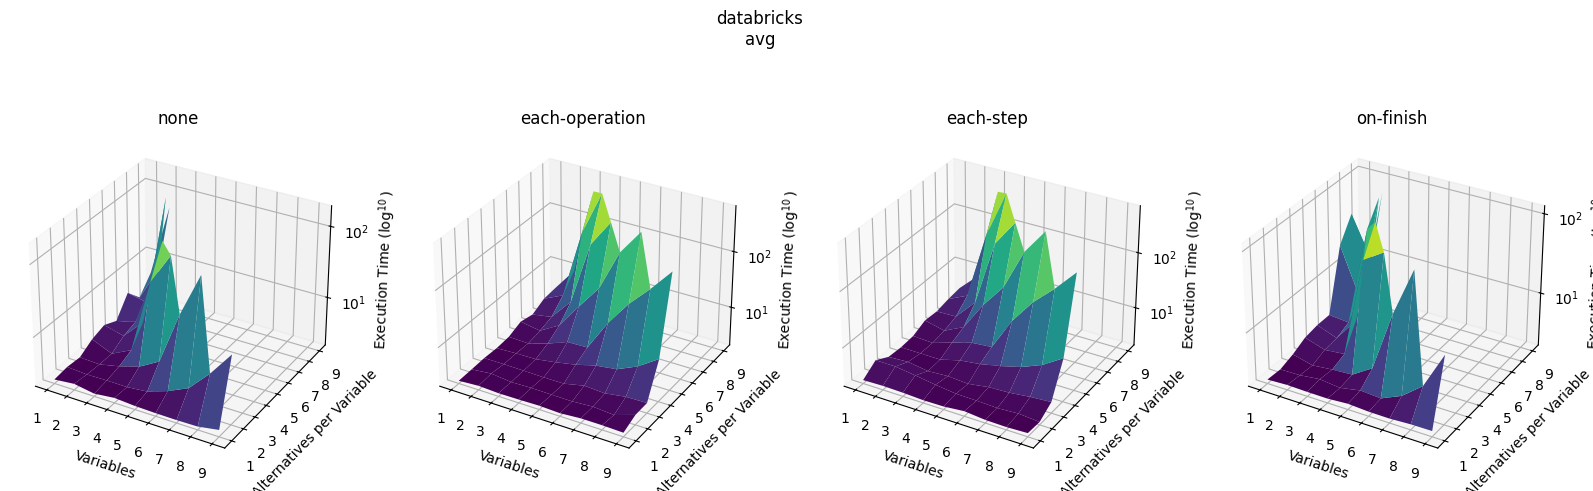

databricks


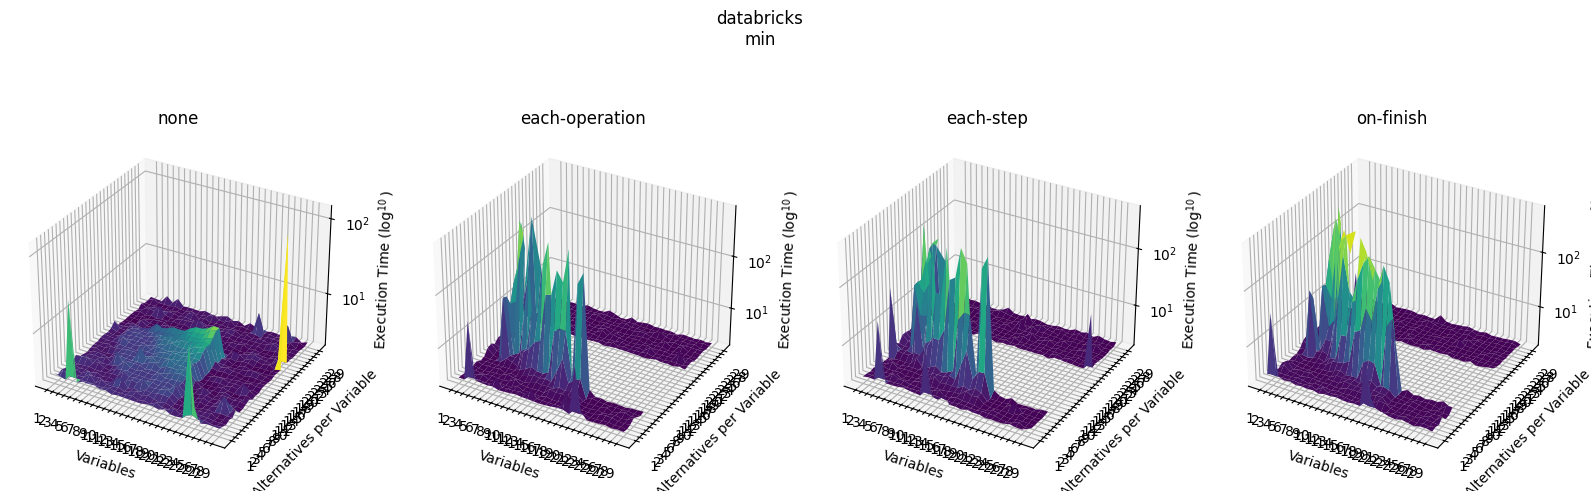

databricks


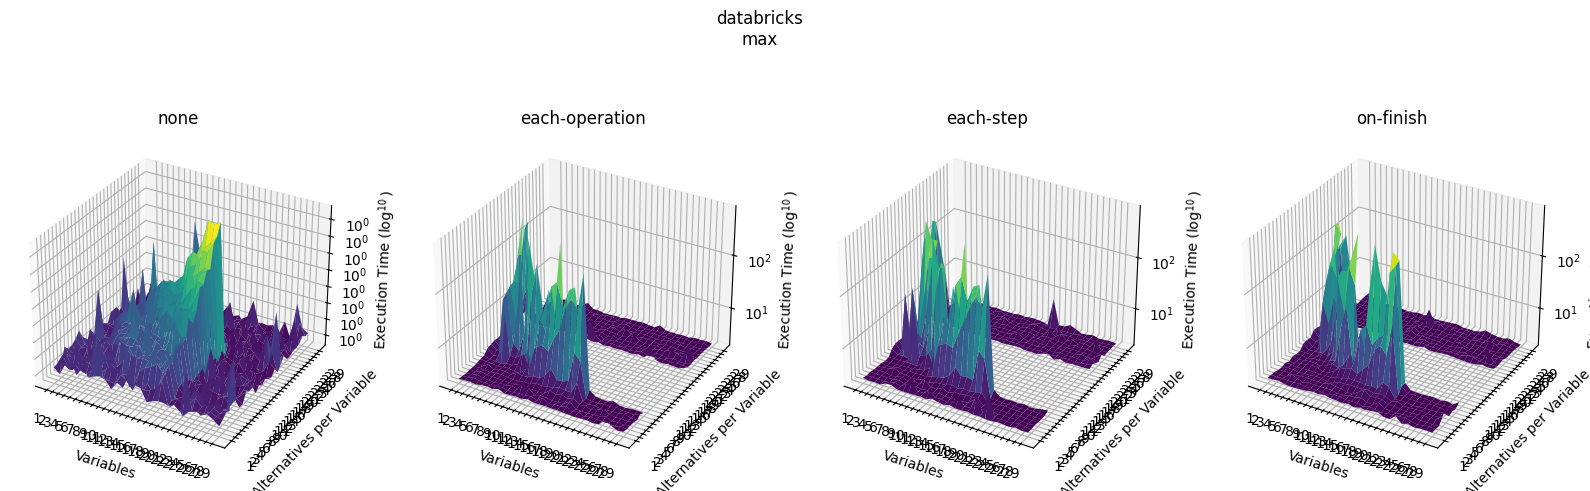

In [36]:
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"

for target in targets:
    for experiment in experiments:
        fig, axs = plt.subplots(
            nrows=1,
            ncols=4,
            figsize=(20,6),
            subplot_kw=dict(projection="3d")
        )
        fig.suptitle(f"{target}\n{experiment}")
        for i, prune_method in enumerate(pruning_config_hashes.keys()):
            execution_times = np.array(
                experiment_results[target][experiment][prune_method],
                dtype=float
            )

            ax = axs[i]
            
            xrange = np.arange(1, execution_times.shape[0] + 1)
            yrange = np.arange(1, execution_times.shape[1] + 1)
    
            X, Y = np.meshgrid(xrange, yrange)
            
            ax.set_title(prune_method)
            ax.plot_surface(X, Y, np.log10(execution_times), cmap="viridis")
    
            ax.set_xlabel("Variables")
            ax.set_ylabel("Alternatives per Variable")
            ax.set_zlabel("Execution Time ($\\log^{10}$)")
    
            ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
            ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    
            ax.set_xticks(xrange, [f"{x}" for x in xrange])
            ax.set_yticks(yrange, [f"{y}" for y in yrange])

        print(target)
        display(fig)
        plt.close()

In [ ]:
## Comparison Scatter Plots